# Increasing Trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 1.4 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74588 sha256=b758a358299ad1adbccf44f46eb7b8092d5d30a15255640b844cce94f80765da
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 5.4 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 5.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=b43f698a69c6b1b0befea46e4de4d903a528d0bbecc95889bc0d767d903e0618
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khodro = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khodro.csv')
khodro

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,NaN,2630.000000,NaN
1,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,NaN,2642.000000,NaN
2,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,NaN,2626.842105,NaN
3,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,NaN,2599.076923,NaN
4,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.0,2576.398104,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.2,1996.632525,56.742284
170,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.8,1980.088350,50.065500
171,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.8,1964.725567,49.135117
172,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.8,1947.150378,47.525533


In [6]:
khodro_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خودرو.xlsx')
khodro_social

,date and time,view
0,۰۱:۲۹:۳۰ ۱۴۰۰/۰۱/۰۲,7813
1,۰۹:۰۷:۰۱ ۱۴۰۰/۰۱/۰۲,1636
2,۱۰:۳۲:۳۵ ۱۴۰۰/۰۱/۰۲,3
3,۱۶:۳۳:۰۰ ۱۴۰۰/۰۱/۰۲,374
4,۱۹:۳۹:۵۹ ۱۴۰۰/۰۱/۰۲,302
...,...,...
7430,۱۶:۳۱:۲۳ ۱۴۰۰/۱۱/۰۳,2
7431,۱۶:۵۱:۰۳ ۱۴۰۰/۱۱/۰۳,2198
7432,۱۷:۰۱:۴۵ ۱۴۰۰/۱۱/۰۳,8
7433,۱۷:۵۲:۴۷ ۱۴۰۰/۱۱/۰۳,115


In [7]:
khodro_social.columns = ['date and time', 'view']
khodro_social['presian_date'] = khodro_social['date and time'].apply(lambda x: x.split(" ")[1])
khodro_social['gregorian_date'] = khodro_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khodro_social = khodro_social[['gregorian_date', 'view']]
khodro_social = khodro_social.groupby(by='gregorian_date').mean()
khodro_social['gregorian_date'] = khodro_social.index
khodro_social['gregorian_date'] = khodro_social['gregorian_date'].astype(str)
khodro_social['index'] = [i for i in range(len(khodro_social))]
khodro_social.set_index('index', inplace=True)
khodro_social

,view,gregorian_date
index,,
0,1460.428571,2021-03-22
1,5910.000000,2021-03-23
2,5645.000000,2021-03-24
3,3258.000000,2021-03-25
4,3013.400000,2021-03-26
...,...,...
301,2509.538462,2022-01-19
302,2520.000000,2022-01-20
303,2546.380952,2022-01-21


# Merging

In [8]:
khodro_df=pd.merge(khodro,khodro_social, on='gregorian_date', how='inner')
khodro_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,NaN,2630.000000,NaN,5568.864865
1,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,NaN,2642.000000,NaN,6001.179487
2,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,NaN,2626.842105,NaN,5435.250000
3,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,NaN,2599.076923,NaN,6027.512195
4,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.0,2576.398104,NaN,5911.650000
...,...,...,...,...,...,...,...,...,...,...,...,...
169,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.2,1996.632525,56.742284,3953.476190
170,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.8,1980.088350,50.065500,4608.045455
171,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.8,1964.725567,49.135117,2509.538462
172,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.8,1947.150378,47.525533,2189.679012


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    loss[oneday < 0] = oneday[ oneday < 0 ]
    

    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khodro_df['view'] = khodro_df['view'].to_frame()
khodro_df['SMA5_view'] = khodro_df['view'].rolling(5).mean()
khodro_df['EWMA5_view'] = khodro_df['view'].ewm(span=5).mean()
khodro_df['RSI_view'] = computeRSI(khodro_df['view'], 14)

In [11]:
khodro_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,NaN,2630.000000,NaN,5568.864865,NaN,5568.864865,NaN
1,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,NaN,2642.000000,NaN,6001.179487,NaN,5828.253638,NaN
2,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,NaN,2626.842105,NaN,5435.250000,NaN,5642.094020,NaN
3,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,NaN,2599.076923,NaN,6027.512195,NaN,5802.190801,NaN
4,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.0,2576.398104,NaN,5911.650000,5788.891309,5844.210683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.2,1996.632525,56.742284,3953.476190,3813.358964,3676.534832,51.598308
170,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.8,1980.088350,50.065500,4608.045455,3946.334721,3987.038373,54.014358
171,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.8,1964.725567,49.135117,2509.538462,3503.792413,3494.538402,46.073989
172,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.8,1947.150378,47.525533,2189.679012,3301.500765,3059.585272,44.988400


# RSI

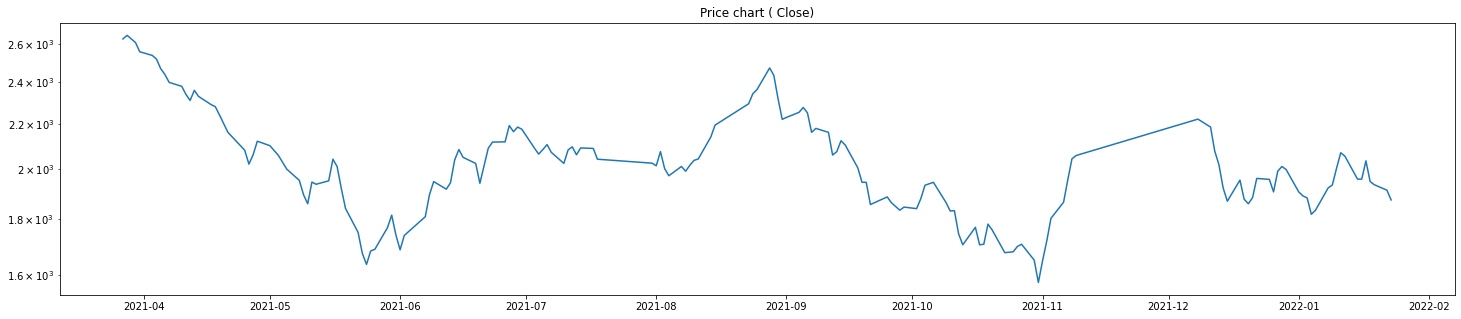

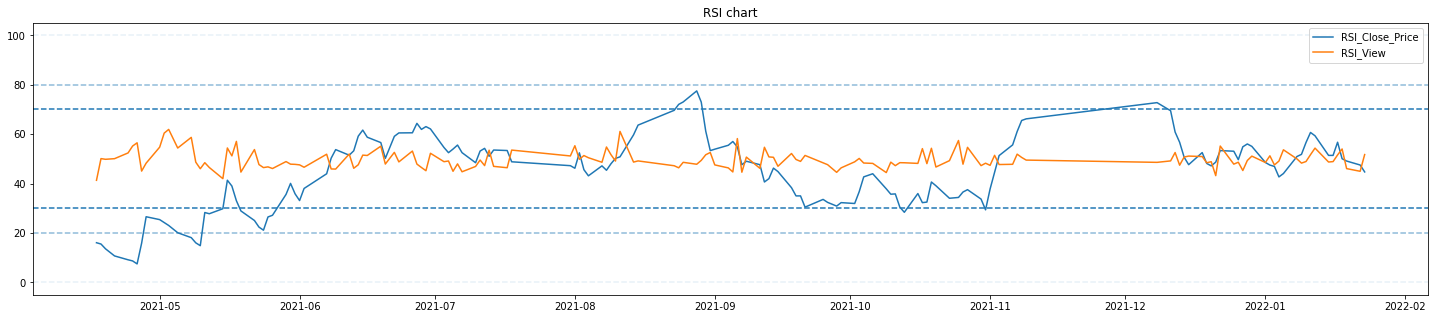

In [12]:
plt.figure(figsize=(25,5))
khodro_df['date'] = pd.to_datetime(khodro_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khodro_df['date'], khodro_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khodro_df['date'], khodro_df['RSI'],label='RSI_Close_Price')
plt.plot(khodro_df['date'], khodro_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [13]:
# Force lowercase (optional)
khodro_df.columns = [x.lower() for x in khodro_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=(khodro_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=khodro_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=khodro_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [ ]:
khodro_df.columns = [x.lower() for x in khodro_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=(khodro_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=khodro_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khodro_df['gregorian_date'],
        y=khodro_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khodro_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,NaN,2630.000000,NaN,5568.864865,NaN,5568.864865,NaN,2021-03-27
1,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,NaN,2642.000000,NaN,6001.179487,NaN,5828.253638,NaN,2021-03-28
2,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,NaN,2626.842105,NaN,5435.250000,NaN,5642.094020,NaN,2021-03-30
3,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,NaN,2599.076923,NaN,6027.512195,NaN,5802.190801,NaN,2021-03-31
4,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.0,2576.398104,NaN,5911.650000,5788.891309,5844.210683,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.2,1996.632525,56.742284,3953.476190,3813.358964,3676.534832,51.598308,2022-01-17
170,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.8,1980.088350,50.065500,4608.045455,3946.334721,3987.038373,54.014358,2022-01-18
171,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.8,1964.725567,49.135117,2509.538462,3503.792413,3494.538402,46.073989,2022-01-19
172,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.8,1947.150378,47.525533,2189.679012,3301.500765,3059.585272,44.988400,2022-01-22


In [ ]:
khodro_df['sma5']=khodro_df['sma5'].fillna(value=khodro_df['sma5'].mean())
khodro_df['rsi']=khodro_df['rsi'].fillna(value=khodro_df['rsi'].mean())
khodro_df['sma5_view']=khodro_df['sma5_view'].fillna(value=khodro_df['sma5_view'].mean())
khodro_df['rsi_view']=khodro_df['rsi_view'].fillna(value=khodro_df['rsi_view'].mean())

In [ ]:
khodro_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2520.0,2490.0,2690.0,2630.0,1400-1-7,خودرو,878226906,2021-03-27,2012.267059,2630.000000,44.492614,5568.864865,4438.852025,5568.864865,49.686488,2021-03-27
1,2670.0,2590.0,2730.0,2650.0,1400-1-8,خودرو,343600591,2021-03-28,2012.267059,2642.000000,44.492614,6001.179487,4438.852025,5828.253638,49.686488,2021-03-28
2,2640.0,2600.0,2640.0,2610.0,1400-1-10,خودرو,123895903,2021-03-30,2012.267059,2626.842105,44.492614,5435.250000,4438.852025,5642.094020,49.686488,2021-03-30
3,2560.0,2560.0,2580.0,2560.0,1400-1-11,خودرو,78264146,2021-03-31,2012.267059,2599.076923,44.492614,6027.512195,4438.852025,5802.190801,49.686488,2021-03-31
4,2510.0,2510.0,2510.0,2540.0,1400-1-14,خودرو,22306197,2021-04-03,2598.000000,2576.398104,44.492614,5911.650000,5788.891309,5844.210683,49.686488,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1990.0,1985.0,2054.0,2034.0,1400-10-27,خودرو,548835115,2022-01-17,2014.200000,1996.632525,56.742284,3953.476190,3813.358964,3676.534832,51.598308,2022-01-17
170,1990.0,1933.0,2009.0,1947.0,1400-10-28,خودرو,234613428,2022-01-18,1989.800000,1980.088350,50.065500,4608.045455,3946.334721,3987.038373,54.014358,2022-01-18
171,1920.0,1891.0,1986.0,1934.0,1400-10-29,خودرو,259186005,2022-01-19,1965.800000,1964.725567,49.135117,2509.538462,3503.792413,3494.538402,46.073989,2022-01-19
172,1960.0,1853.0,1994.0,1912.0,1400-11-2,خودرو,267244612,2022-01-22,1956.800000,1947.150378,47.525533,2189.679012,3301.500765,3059.585272,44.988400,2022-01-22


In [ ]:
khodro_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price 

In [ ]:
#khodro_new = khodro_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
khodro_new = khodro_df[['gregorian_date','close']]
#khodro_new = khodro_df[['gregorian_date','close']]

print("Shape of dataframe:", khodro_new.shape)

Shape of dataframe: (174, 2)


In [ ]:
del khodro_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khodro_new=scaler.fit_transform(np.array(khodro_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.75):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khodro_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (135, 1)
test_data:  (39, 1)
X_train:  (119, 15)
y_train:  (119,)
X_test:  (23, 15)
y_test (23,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


# Model

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# Fit

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
4/4 [==============================] - 14s 539ms/step - loss: 0.1097 - val_loss: 0.0196
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0295 - val_loss: 0.0170
Epoch 3/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0376 - val_loss: 0.0075
Epoch 4/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0211 - val_loss: 0.0053
Epoch 5/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0257 - val_loss: 0.0078
Epoch 6/50
4/4 [==============================] - 0s 40ms/step - loss: 0.0257 - val_loss: 0.0045
Epoch 7/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0215 - val_loss: 0.0048
Epoch 8/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0217 - val_loss: 0.0057
Epoch 9/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0214 - val_loss: 0.0040
Epoch 10/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0200 - val_loss: 0.0039
Epoch 11/50
4/4 [==========

# loss

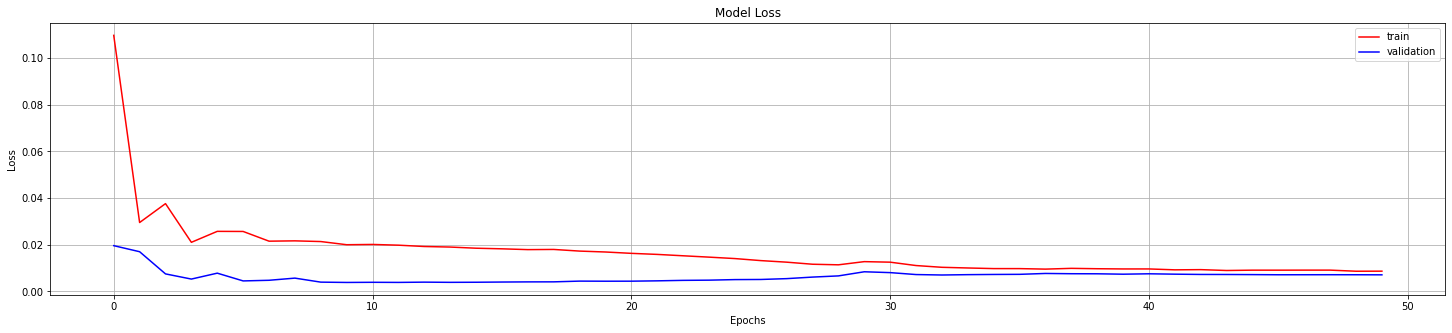

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: -1.0364603928706746


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.38085371255874634], [0.36259353160858154], [0.3479534983634949], [0.33904674649238586], [0.33661261200904846]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khodro_new[len(khodro_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price ','Predicted next 5 days of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", )
fig.add_hrect(y0=16, y1=20, line_width=0)


fig.update_layout(title_text='Compare last 15 days vs next 5 days',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =1873 , 4 bahmn = 1904   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =1873 ,  our model prediction for 4 bahmn(timestamp=16) = 1953 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction with adding social indicators


In [ ]:
khodro_new = khodro_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


In [ ]:
del khodro_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khodro_new=scaler.fit_transform(np.array(khodro_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khodro_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (542, 1)
test_data:  (154, 1)
X_train:  (526, 15)
y_train:  (526,)
X_test:  (138, 15)
y_test (138,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
17/17 [==============================] - 14s 128ms/step - loss: 0.0672 - val_loss: 0.0316
Epoch 2/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0596 - val_loss: 0.0347
Epoch 3/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0585 - val_loss: 0.0316
Epoch 4/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0580 - val_loss: 0.0333
Epoch 5/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0580 - val_loss: 0.0324
Epoch 6/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0577 - val_loss: 0.0328
Epoch 7/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0576 - val_loss: 0.0333
Epoch 8/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0573 - val_loss: 0.0315
Epoch 9/50
17/17 [==============================] - 1s 33ms/step - loss: 0.0568 - val_loss: 0.0350
Epoch 10/50
17/17 [==============================] - 1s 34ms/step - loss: 0.0534 - val_loss: 0.0400
Epoch 1

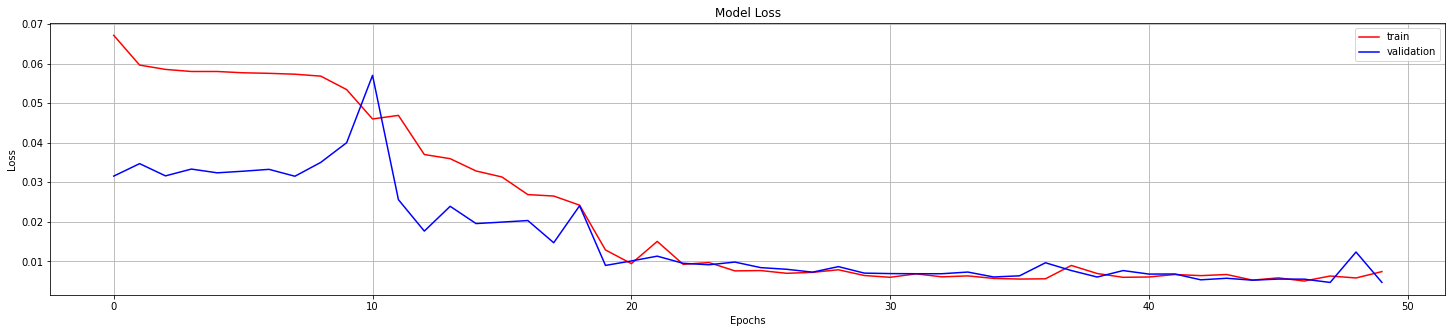

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.8494095103130163


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        #print("{} day input {}".format(i,x_input))
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        #print(temp_input)
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[-0.04797438904643059], [0.09295295923948288], [0.17247769236564636], [0.4178796708583832], [-0.009957598522305489]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khodro_new[len(khodro_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =1873 , 4 bahmn = 1904   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price with indicators  --> 3 bahman (timestamp=15) in our data =3443,  our model prediction for 4 bahmn(timestamp=16) = -388 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So social indicators cant help us to predict the trend correctly